In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("../cleaned-data.csv")
df = df.drop(columns=['Unnamed: 0'], axis=1)
df["START DATE"] = pd.to_datetime(df["START DATE"])
df["END DATE"] = pd.to_datetime(df["END DATE"])
df = df[["BIOGUIDE_ID", "QUARTER", "YEAR", "OFFICE", "CATEGORY", "PURPOSE", "PAYEE", "START DATE", "END DATE", "coverage_period", "AMOUNT"]]

df.head()

/Users/arminkhayyer/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,BIOGUIDE_ID,QUARTER,YEAR,OFFICE,CATEGORY,PURPOSE,PAYEE,START DATE,END DATE,coverage_period,AMOUNT
0,NaN,2017Q3,2017,OFFICE OF THE SPEAKER,PERSONNEL COMPENSATION,CONSERVATIVE OUTREACH DIRECTOR,ALTHOUSE JOSHUA S,2017-07-01,2017-09-30,91,20000.01
1,NaN,2017Q3,2017,OFFICE OF THE SPEAKER,PERSONNEL COMPENSATION,PRESS SECRETARY,ANDRES DOUGLAS R,2017-07-01,2017-09-30,91,27500.01
2,NaN,2017Q3,2017,OFFICE OF THE SPEAKER,PERSONNEL COMPENSATION,MEMBER SERVICES DIRECTOR,ANDREWS THOMAS S,2017-07-01,2017-09-30,91,32499.99
3,NaN,2017Q3,2017,OFFICE OF THE SPEAKER,PERSONNEL COMPENSATION,ASST TO THE SPEAKER FOR POLICY,ANTELL GEOFFREY,2017-07-01,2017-09-30,91,41250.00
4,NaN,2017Q3,2017,OFFICE OF THE SPEAKER,PERSONNEL COMPENSATION,SYSTEM ADMINISTRATOR,BENJAMIN WILLIAM C.,2017-07-01,2017-09-30,91,13250.01


question 1. What is the most expensive payee?
we have several payees,it's not good to just group buy that. what else we can do we can find the purpose of the largest amount payed. 

In [2]:
max_amount =df.loc[df.AMOUNT == max(df.AMOUNT), :] 
max_amount

,BIOGUIDE_ID,QUARTER,YEAR,OFFICE,CATEGORY,PURPOSE,PAYEE,START DATE,END DATE,coverage_period,AMOUNT
184760,NaN,2017Q4,2017,GOVERNMENT CONTRIBUTIONS,PERSONNEL BENEFITS,FERS,,2017-12-01,2017-12-31,30,6789603.47


[['Rep' 'Mike' 'Rogers' 'R' 'M']]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


[['Rep' 'Mike' 'Kelly' 'R' 'M']]
[['Com' 'Pedro' 'Pierluisi' 'D' 'M']]


No handles with labels found to put in legend.


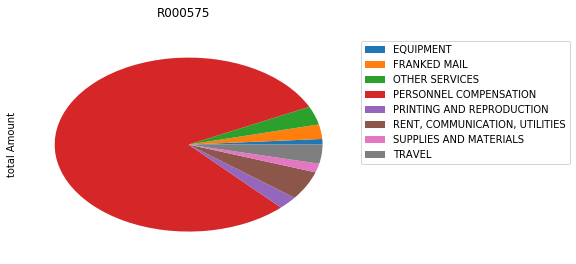

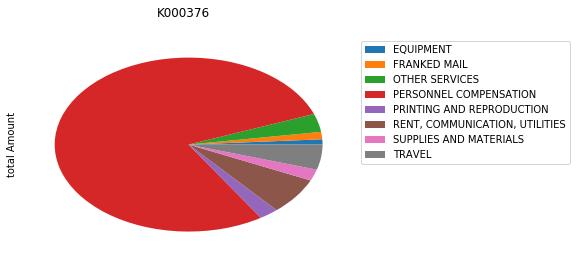

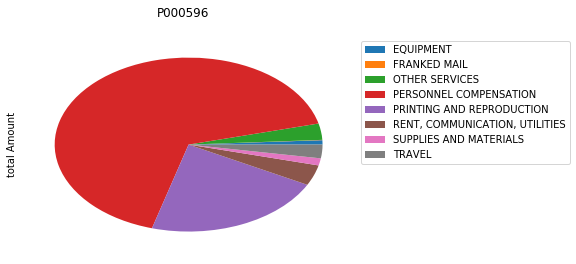

In [4]:
biodf = df.dropna(subset=["BIOGUIDE_ID"])
largest_bios = biodf.groupby(["BIOGUIDE_ID"])["AMOUNT"].sum().nlargest(3).index

import matplotlib.pyplot as plt 
legislators = pd.read_csv("../legislators_updated.csv")
for i in largest_bios:
    print(legislators.loc[legislators.bioguide_id == i, ["title", "firstname", "lastname", "party", "gender"]].values)
    a = biodf.loc[biodf.BIOGUIDE_ID == i, ["PURPOSE", "CATEGORY", "AMOUNT", "YEAR"]].groupby(["CATEGORY"])["AMOUNT"].aggregate(["sum"])
    a["total Amount"] = a["sum"]
    a = a[["total Amount"]]
    a.plot.pie(subplots=True, labels= None, title=i)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1), labels= a.index)                                                                                                                       

question 2. Which year was the most expensive year for the House?

     coverage_period                         AMOUNT                      
                mean   count       sum         mean   count           sum
YEAR                                                                     
2010       29.978541  413389  12392799  2435.586580  413389  1.006845e+09
2011       31.756270  386063  12259921  2702.034817  386063  1.043156e+09
2012       32.824333  351784  11547075  2837.021456  351784  9.980188e+08
2013       33.333117  335498  11183194  2734.662510  335498  9.174738e+08
2014       32.322060  325800  10530527  2846.581721  325800  9.274163e+08
2015       31.501539  333007  10490233  2784.453582  333007  9.272425e+08
2016       30.037610  334722  10054249  2824.880631  334722  9.455497e+08
2017       29.059175  393559  11436500  3068.204342  393559  1.207519e+09


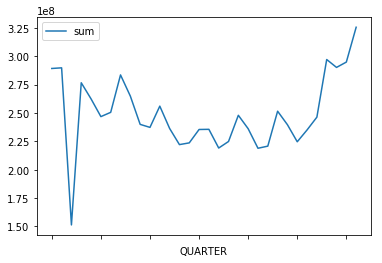

In [5]:

print(df.groupby(["YEAR"]).aggregate(["mean", "count", "sum"]))
quarterly_group = df.groupby(["QUARTER"])["AMOUNT"].aggregate([ "sum"])
quarterly_group.plot()



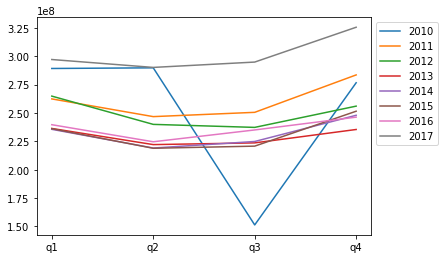

In [6]:
import matplotlib.pyplot as plt 

for i in range(2010, 2018):
    a = df.loc[df.YEAR == i, :].groupby(["QUARTER"])["AMOUNT"].sum()
    y = a.values
    xlablels= ["q1", "q2", "q3", "q4"]
    plt.plot(xlablels, y, label= i)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()

In [ ]:
# pie chart yearly
#df.groupby(["YEAR"])["AMOUNT"].sum().plot.pie(subplots=True)

#plot.pie(subplots=True)


question 3. Graphic How expenses changed during time?

In [ ]:
#df.boxplot(column= ["AMOUNT"], by= ["YEAR"], showbox=True)

question 4. Which office was the most expensive in each year?

In [7]:
max_OFFICE = df.groupby(["YEAR", "OFFICE"])["AMOUNT"].sum()
for i in range(2010, 2018):
    print("The most expensive office in year {} is ".format(i), max_OFFICE[i].idxmax(), "with total expenditure of", max_OFFICE[i].max())

The most expensive office in year 2010 is  HOUSE INFORMATION RESOURCES with total expenditure of 35293000.74999965
The most expensive office in year 2011 is  CHIEF ADMIN OFCR OF THE HOUSE with total expenditure of 140495758.15000015
The most expensive office in year 2012 is  CHIEF ADMIN OFCR OF THE HOUSE with total expenditure of 120877032.13999988
The most expensive office in year 2013 is  CHIEF ADMIN OFCR OF THE HOUSE with total expenditure of 109105027.95000017
The most expensive office in year 2014 is  CHIEF ADMIN OFCR OF THE HOUSE with total expenditure of 109211560.04999961
The most expensive office in year 2015 is  CHIEF ADMIN OFCR OF THE HOUSE with total expenditure of 87561524.60000005
The most expensive office in year 2016 is  CHIEF ADMIN OFCR OF THE HOUSE with total expenditure of 126043024.37000008
The most expensive office in year 2017 is  GOVERNMENT CONTRIBUTIONS with total expenditure of 248596421.7500009


question 6. What is the most commun purpose to spend money in House?

In [8]:
#yearly Federal Employees Retirement System as FERS
max_Purpose = df.groupby(["YEAR", "PURPOSE"])["AMOUNT"].sum()
for i in range(2010, 2018):
    print("The most expensive PURPOSE in year {} is ".format(i), max_Purpose[i].idxmax(), "with total expenditure of", max_Purpose[i].max())

The most expensive PURPOSE in year 2010 is  CHIEF OF STAFF with total expenditure of 44299411.83999991
The most expensive PURPOSE in year 2011 is  CHIEF OF STAFF with total expenditure of 54147818.38
The most expensive PURPOSE in year 2012 is  CHIEF OF STAFF with total expenditure of 53421922.74999992
The most expensive PURPOSE in year 2013 is  CHIEF OF STAFF with total expenditure of 56105506.47999993
The most expensive PURPOSE in year 2014 is  CHIEF OF STAFF with total expenditure of 57171284.24000005
The most expensive PURPOSE in year 2015 is  CHIEF OF STAFF with total expenditure of 58300528.569999985
The most expensive PURPOSE in year 2016 is  CHIEF OF STAFF with total expenditure of 59641340.92999996
The most expensive PURPOSE in year 2017 is  FERS with total expenditure of 76140529.61999999


In [ ]:
# overall
#df.groupby(["PURPOSE"])["AMOUNT"].sum().idxmax()


question 7. How much was the total expenditure for each purpose? we have so many purposes, it's not a good idea to check for all of those. instead we can check for the top 5 or 10 

In [9]:
print(df.groupby(["PURPOSE"])["AMOUNT"].sum().nlargest(5))

PURPOSE
CHIEF OF STAFF                  4.442450e+08
STAFF ASSISTANT                 2.661885e+08
LEGISLATIVE ASSISTANT           2.358700e+08
TECHNOLOGY SERVICE CONTRACTS    2.338764e+08
DISTRICT DIRECTOR               2.124183e+08
Name: AMOUNT, dtype: float64


question 8. Graphic of total expenses in each year.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117582c50>]],
      dtype=object)

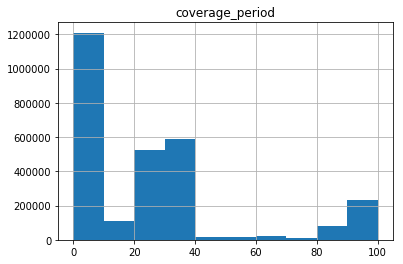

In [10]:
# histogram of coverage periods 
dfnew = df.loc[(df["coverage_period"] >=0) & (df["coverage_period"] <=100), :]
dfnew.hist(column= ["coverage_period"], bins=10)

<BarContainer object of 11 artists>

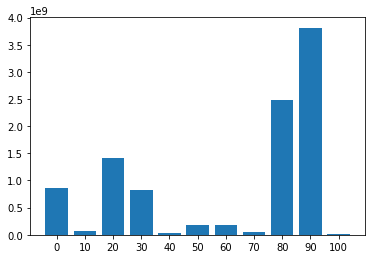

In [11]:
bins = []
performance = np.arange(0, 110, 10)
performance = [str(i) for i in performance]
for i in range(0, 110, 10):
    a = df.loc[(df["coverage_period"] >=i) & (df["coverage_period"] <= i +10), :]
    bins.append(sum(a.AMOUNT))

plt.bar(performance, bins, align='center')

In [12]:
#18- check to see what purposes caused the expenditure for coverage perioed between the range oof 80-90

covdf = df.loc[(df.coverage_period >= 80)&(df.coverage_period <= 1000), :]
covdf.groupby(["CATEGORY"])["AMOUNT"].sum().nlargest(5)

CATEGORY
PERSONNEL COMPENSATION    4.937433e+09
PERSONNEL BENEFITS        1.180217e+08
SUPPLIES AND MATERIALS    7.022684e+07
OTHER SERVICES            6.713816e+07
EQUIPMENT                 3.388694e+07
Name: AMOUNT, dtype: float64

question 9. Graphic of total expensen in each year considering quarters.

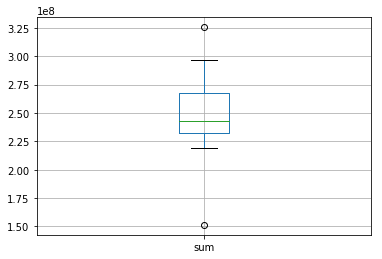

In [13]:
quarterly = df.groupby(["QUARTER"])["AMOUNT"].aggregate(["sum"])

dfquarterly = pd.DataFrame(quarterly)
#dfquarterly.index
quarterly.boxplot()

question 10. Graphic of comparing the expense of each office during year... (can be lines for each office)
11. Changes in aggregate House expenditures (arranged by 2009 expenditure size)
12. Changes in staffing force, by position (for 20 most expensive positions by total expenditures, arranged from biggest decline to biggest gain)
13. 

In [14]:
 #changes for personal compensation in percentile- the first 5 largest and smallest.
    
from congress import Congress
personal_comp_df = df.loc[df.CATEGORY == "PERSONNEL COMPENSATION", :]
#print(personal_comp_df.loc[df.PAYEE == "AVANT, ISSAC L", :])
MOST_EXP_EMP = list(personal_comp_df.groupby([ "BIOGUIDE_ID"])["AMOUNT"].sum().nlargest(5).index)

api_key = 'Z7cnuQ3cufA08VfbWOoqURVpeSUuyT8QQazVwAGY'
congress = Congress(api_key)
congressmans = [congress.members.get(i) for i in MOST_EXP_EMP]

required_data = ["title", "state", "party", "committees" ]    
final = []
for i in congressmans:
    raw_dict = i["roles"][0]
    congressman_info = dict((key,value) for key, value in raw_dict.items() if key in required_data)
    final.append(congressman_info)
    
for i in final:
    congressman_comittee = i["committees"][0]["name"]
    i.pop("committees")
    i.update({"committee":congressman_comittee})

for i in final: 
    index = final.index(i)
    i.update({"Name":(congressmans[index]["first_name"] + " " +  congressmans[index]["last_name"] )})

final_df = []
for i in MOST_EXP_EMP:
    a = personal_comp_df.loc[df.BIOGUIDE_ID == i, :]["AMOUNT"].sum()
    unique_number_of_payee = len(personal_comp_df.loc[df.BIOGUIDE_ID == i, ["PAYEE"]]["PAYEE"].unique())
    total_expenditure = df.loc[df.BIOGUIDE_ID == i, "AMOUNT"].sum()
    percentage = str(np.round(a/total_expenditure * 100, decimals=2)) + "%"
    index = MOST_EXP_EMP.index(i)
    final[index].update({"total":a, "number of staff": unique_number_of_payee, "Bio Guide ID": i, "Percentage":percentage})
    final_df.append(final[index])

final_df = pd.DataFrame.from_dict(final_df)
final_df.head()

,Bio Guide ID,Name,Percentage,committee,number of staff,party,state,title,total
0,R000575,Mike Rogers,79.97%,Committee on Agriculture,106,R,AL,Representative,11354551.34
1,K000376,Mike Kelly,78.36%,Committee on Ways and Means,130,R,PA,Representative,10357002.32
2,N000002,Jerrold Nadler,82.05%,Committee on the Judiciary,71,D,NY,Representative,9064936.04
3,T000460,Mike Thompson,83.56%,Committee on Ways and Means,86,D,CA,Representative,9011377.43
4,M000087,Carolyn Maloney,78.33%,Joint Economic Committee,86,D,NY,Representative,8958469.02


In [15]:
df.groupby(["OFFICE"])["AMOUNT"].sum().nlargest(5)

OFFICE
CHIEF ADMIN OFCR OF THE HOUSE     8.467673e+08
GOVERNMENT CONTRIBUTIONS          3.759646e+08
COMMITTEE ON APPROPRIATIONS       1.940450e+08
CLERK OF THE HOUSE                1.767306e+08
COMMITTEE ON ENERGY & COMMERCE    8.109636e+07
Name: AMOUNT, dtype: float64

14- expenditure for each party in each years. 
15- group by states 
16 - group by party, year, purpose 
17 - bar charts for parties in each year
18- check to see what purposes caused the expenditure for coverage perioed between the range oof 80-90
19- changes for personal compensation in percentile- the first 5 largest and smallest. 
20 - bar chart, yearly, with categories showed by different colors. 
21- correaltion between party, state, amount, gender, travel

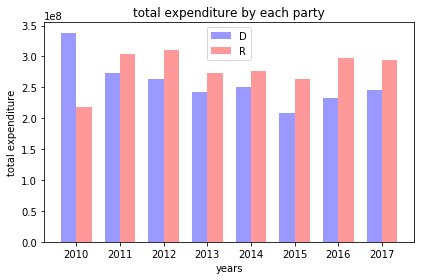

In [16]:
#14- expenditure for each party in each years.
   
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

unique_biodf = df.dropna(subset=["BIOGUIDE_ID"])
unique_biodf = unique_biodf.groupby([ "YEAR","BIOGUIDE_ID"])["AMOUNT"].aggregate(['sum'])
#unique_biodf["BIOGUIDE_ID"] = unique_biodf.index
unique_biodf = unique_biodf.reset_index()
legis = pd.read_csv("../legislators_updated.csv")

def find_party(row):
    bio = row.BIOGUIDE_ID
    party =  legis.loc[legis.bioguide_id == bio, "party"].values
    return str(party)[2:3]
    
unique_biodf["party"] = unique_biodf.apply(lambda row: find_party(row), axis= 1)
unique_biodf = unique_biodf.loc[unique_biodf.party != "", :]
stacked_bar = unique_biodf.groupby(["YEAR", "party"])["sum"].aggregate(["sum"]).reset_index()
years = stacked_bar.YEAR.unique()
height_D = list(stacked_bar.loc[stacked_bar.party == "D", "sum"])
height_R = list(stacked_bar.loc[stacked_bar.party == "R", "sum"])

fig, ax = plt.subplots()
#index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(years, height_D , bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='D')

rects2 = ax.bar(years + bar_width, height_R, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='R')

ax.set_xlabel('years')
ax.set_ylabel('total expenditure')
ax.set_title('total expenditure by each party')
ax.set_xticks(years + bar_width / 2)
ax.set_xticklabels(years)
ax.legend()

fig.tight_layout()
plt.show()  

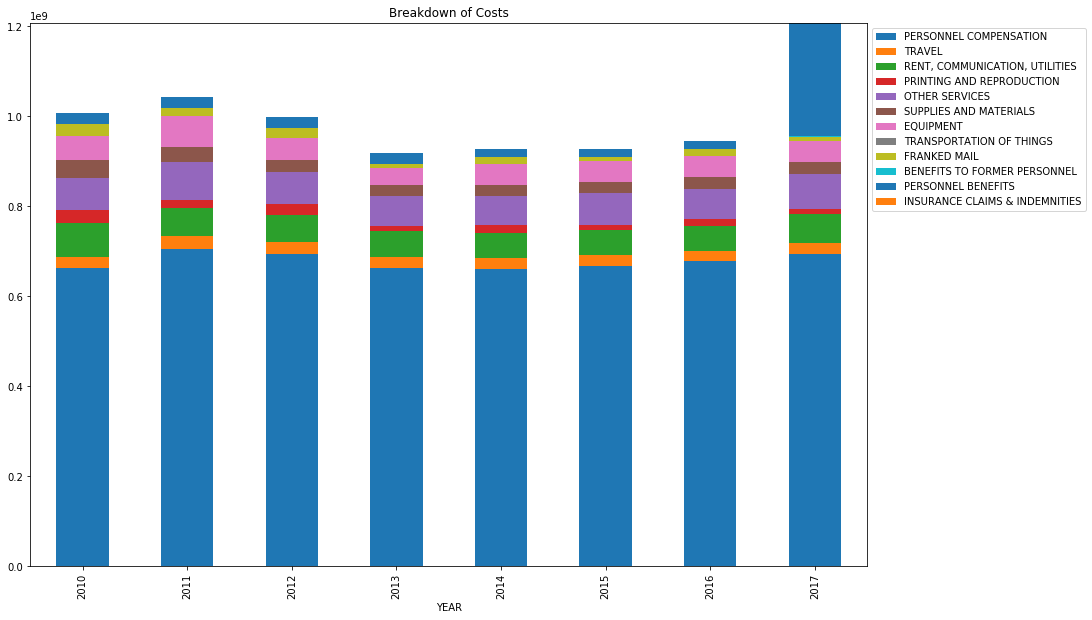

In [24]:
#stacked bar charts yearly for the 5 largest categories. 

#stacked_category = df.groupby(["YEAR", "CATEGORY"])["AMOUNT"].sum().reset_index()
#print(stacked_category)

yearly_df= df.groupby(["YEAR"]).sum().reset_index()


all_categories = df.CATEGORY.unique()
for cat in all_categories:
    for year in range (2010, 2018):
        a =  df.loc[(df.YEAR == year)&(df.CATEGORY == cat), "AMOUNT"].sum()
        yearly_df.loc[yearly_df.YEAR == year, cat] = a
        
        
yearly_df = yearly_df.drop(columns=["coverage_period", "AMOUNT"])     
yearly_df.plot(x="YEAR", kind='bar', stacked=True, title='Breakdown of Costs', mark_right=True, figsize = (15,10) )    
plt.legend(loc="upper left", bbox_to_anchor=(1,1))



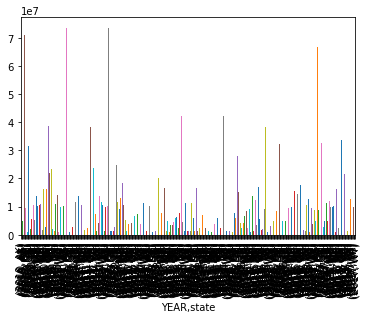

In [25]:
 #15- group by states, show it in js
    
unique_biodf_states = df.dropna(subset=["BIOGUIDE_ID"])
unique_biodf_states = unique_biodf_states.groupby([ "YEAR","BIOGUIDE_ID"])["AMOUNT"].aggregate(['sum'])
unique_biodf_states = unique_biodf_states.reset_index()
legiss = pd.read_csv("../legislators_updated.csv")

def find_state(row):
    bio = row.BIOGUIDE_ID
    state =  legiss.loc[legiss.bioguide_id == bio, "state"].values
    return str(state)[2:4]

unique_biodf_states["state"] = unique_biodf_states.apply(lambda row: find_state(row), axis= 1)

unique_biodf_states = unique_biodf_states.loc[unique_biodf_states.state != "", :]
unique_biodf_states.groupby(["YEAR", "state"])["sum"].sum().plot(kind ="bar")



In [ ]:
import HTML
<input class="btn"></input>